In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
local_df = pd.read_csv("../measurements/local/map.csv")
map_df = pd.read_csv("../measurements/JPEG_manager_test/map.csv")
cha_df = pd.read_csv("../measurements/JPEG_manager_test/characteristic.csv")

static_map_df = pd.read_csv("../measurements/jpeg_no_change/map.csv")
static_cha_df = pd.read_csv("../measurements/jpeg_no_change/characteristic.csv")

In [3]:
cha_df.head()

,pruning_thresh,quality,technique,bandwidth,mAP_drop,frame_id,sparsity,decomposability,regularity,pictoriality,datasize_est,datasize_real,reconstruct_snr,target_cmp,target_snr
0,0.05,89,1,19910000.0,40,1,-1,-1,-1,-1,33323,34067,12.295077,23.178436,20
1,0.05,89,1,19810000.0,40,2,-1,-1,-1,-1,25549,26293,17.013867,23.295440,20
2,0.05,89,1,19710000.0,40,3,-1,-1,-1,-1,25407,26151,20.822191,23.413631,20
3,0.05,89,1,19610000.0,40,4,-1,-1,-1,-1,18235,18979,20.992632,23.533027,20
4,0.05,89,1,19510000.0,40,5,-1,-1,-1,-1,9209,9953,20.220141,23.653648,20


# mAP drop

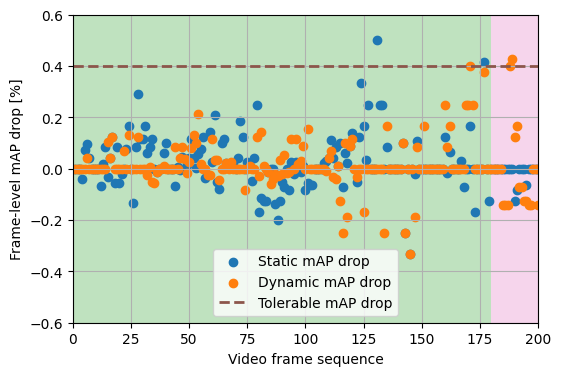

In [4]:

plt.figure(figsize=(6,4))

feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)


plt.scatter(static_map_df["frame_id"].to_numpy(),local_df["map"].to_numpy() - static_map_df["map"].to_numpy(),label="Static mAP drop")
plt.scatter(map_df["frame_id"].to_numpy(),local_df["map"].to_numpy() - map_df["map"].to_numpy(),label="Dynamic mAP drop")
plt.axhline(y=0.4, color='tab:brown', linestyle='--', linewidth=2,label="Tolerable mAP drop")



plt.ylim([-0.6,0.6])
plt.legend()
plt.grid()
plt.xlabel("Video frame sequence")
plt.ylabel("Frame-level mAP drop [%]")
plt.autoscale(axis="x",tight=True)

# Compression ratio

In [5]:
raw_tensor_size = 128*26*26*4 # bytes
cha_df["ratio"] = raw_tensor_size/cha_df["datasize_real"]
static_cha_df["ratio"] = raw_tensor_size/static_cha_df["datasize_real"]

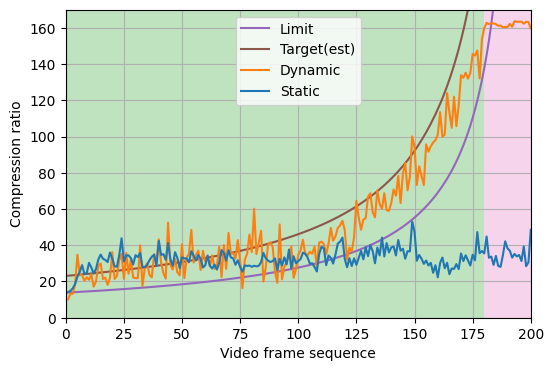

In [10]:
plt.figure(figsize=(6,4))


feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)

plt.plot(cha_df["frame_id"].to_numpy(),raw_tensor_size*8/(cha_df["bandwidth"]*0.01),color="tab:purple",label="Limit")
plt.plot(cha_df["frame_id"].to_numpy(),cha_df["target_cmp"],color="tab:brown",label="Target(est)")
plt.plot(cha_df["frame_id"].to_numpy(),cha_df["ratio"],color="tab:orange",label="Dynamic")
plt.plot(static_cha_df["frame_id"].to_numpy(),static_cha_df["ratio"],color="tab:blue",label="Static")

plt.ylim([0,170])
plt.legend()
plt.grid()
plt.xlabel("Video frame sequence")
plt.ylabel("Compression ratio")
plt.autoscale(axis="x",tight=True)

# Bandwidth

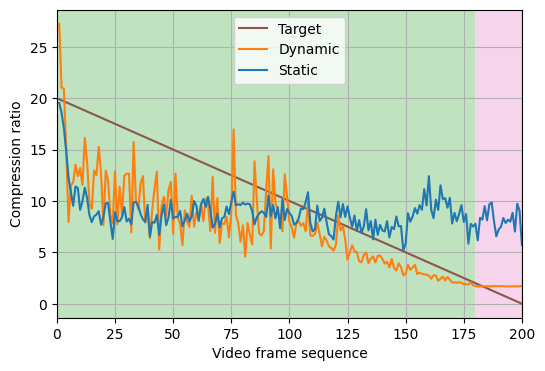

In [9]:
plt.figure(figsize=(6,4))


feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)

plt.plot(cha_df["frame_id"].to_numpy(),cha_df["bandwidth"]/1e6,color="tab:brown",label="Target")
plt.plot(cha_df["frame_id"].to_numpy(),(cha_df["datasize_real"]*8)/(1e6*0.01),color="tab:orange",label="Dynamic")
plt.plot(static_cha_df["frame_id"].to_numpy(),(static_cha_df["datasize_real"]*8)/(1e6*0.01),color="tab:blue",label="Static")

plt.legend()
plt.grid()
plt.xlabel("Video frame sequence")
plt.ylabel("Compression ratio")
plt.autoscale(axis="x",tight=True)